<a href="https://colab.research.google.com/github/Rajit13/My-Project-Works/blob/main/Horizontal_Sundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horizontal Sundial Making and Plotting

Author: [Fahim Rajit Hossain](https://rajit13.github.io/)

There are many types of sundials, the horizontal sundial is generally the type people think of when they hear the word "sundial". The main dial is level to the ground, and has a wedge or angled stick (called the gnomon) in roughly the center of the dial which casts a shadow for reading the time.

The angle the gnomon makes with the sundial plane is equal to the latitude. The base of the gnomon should start where all of the hour lines converge, and increase in height towards 12 noon. And 12 noon should face North if its in the Northern hemisphere, or South if it's in the Southern hemisphere.

Aligning the sundial can be quite simple. Many people try to use a compass or the North Star, or more complicated methods. I find the easiest method (which is also the most accurate), is to just look up the value of the Equation of Time for the day, and set the clock to the right time.

Installing $\LaTeX$ for cool graphs

In [116]:
!sudo apt-get update
!sudo apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,453 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Pack

In [3]:
# font style

# Configure font and text settings
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12
})

## Hour Lines

$$\begin{align*}
      x &= \tan H\\
      y&= \frac{\cos H}{\sin \phi}\\
      \tan &=\frac{x}{y}
\end{align*}$$

Or we can write, $$\tan \theta=\tan H \cdot \sin\phi$$

here,

$\begin{align*}
      \theta &= \text{Line's angle for given hour}\\
      H&= \text{Hour angle of the Sun}\\
      \phi &=\text{latitude}
\end{align*}$

Here let us, plot the above condition

Getting the angles separating hour lines. Here in `phi` or $\phi$ use the desired value of latitude of the Observer (You).





In [23]:
import numpy as np

def get_angles(latitude):
    # Create an empty list to store the angles
    angles = []

    # Convert latitude to radians
    lat_rad = np.radians(latitude)

    for i in range(12):
        # Convert hour to radians (each hour is 15 degrees, or 15 * pi / 180)
        H = i * 15 * np.pi / 180  # Convert hour from hours to radians

        # Calculate x and y components
        x = np.sin(H)
        y = np.cos(H) / np.sin(lat_rad)

        # Calculate the angle using arctangent (atan2)
        theta = np.arctan2(x, y)

        # Append the angle to the list
        angles.append(theta)

    return angles

# Example usage
latitude = 30  # Example latitude in degrees
angles = get_angles(latitude)

# Convert radians to degrees for easier interpretation
angles_degrees = np.degrees(angles)

# Print the angles in the requested format: 12 then 1 to 11
print(f"12: {angles_degrees[0]:.2f}°")  # 12 hour angle first
for hour, angle in zip(range(1, 12), angles_degrees[1:]):  # Loop from 1 to 11 for the remaining hours
    print(f"{hour}: {angle:.2f}°")


12: 0.00°
1: 7.63°
2: 16.10°
3: 26.57°
4: 40.89°
5: 61.81°
6: 90.00°
7: 118.19°
8: 139.11°
9: 153.43°
10: 163.90°
11: 172.37°


### Visualizing the clock style hour lines for example latitude,  $\phi=30^\circ$

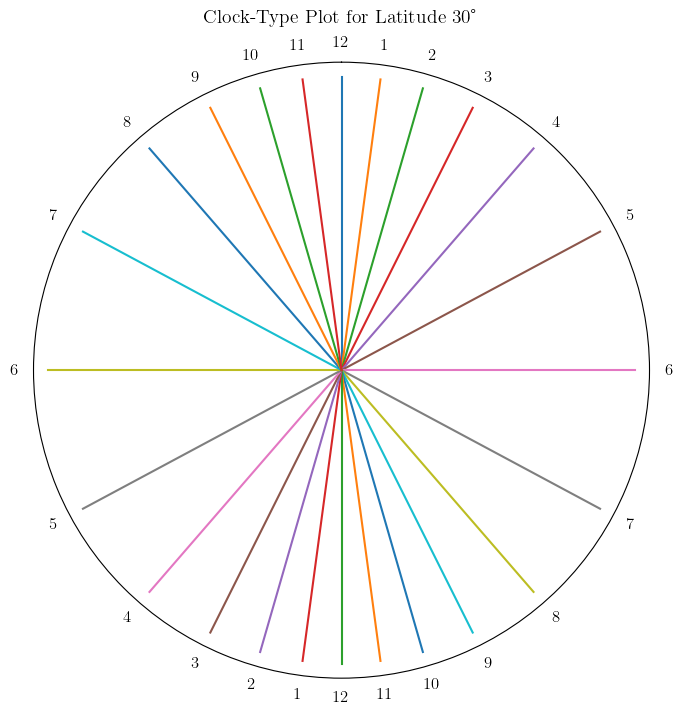

In [35]:
import matplotlib.pyplot as plt
import numpy as np

def get_angles(latitude):
    # Create an empty list to store the angles
    angles = []

    # Convert latitude to radians
    lat_rad = np.radians(latitude)

    for i in range(12):
        # Convert hour to radians (each hour is 15 degrees, or 15 * pi / 180)
        H = i * 15 * np.pi / 180  # Convert hour from hours to radians

        # Calculate x and y components
        x = np.sin(H)
        y = np.cos(H) / np.sin(lat_rad)

        # Calculate the angle using arctangent (atan2)
        theta = np.arctan2(x, y)

        # Append the angle to the list
        angles.append(theta)

    return angles

# Example latitude (you can change this to test different latitudes)
latitude = 30  # Latitude in degrees
angles = get_angles(latitude)

# Convert the list to a NumPy array
angles = np.array(angles)

# Convert radians to degrees for plotting
angles_degrees = np.degrees(angles)

# Data: Hour and corresponding angles in degrees
hours = np.array([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Extend the data to cover 360° (opposite side with same hour values)
hours_full = np.concatenate([hours, hours])
angles_full = np.concatenate([angles_degrees, 180 + angles_degrees])

# Convert angles to radians for polar plotting
angles_rad = np.radians(angles_full)

# Plot setup
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw the hour lines
for i, angle in enumerate(angles_rad):
    ax.plot([angle, angle], [0, 1], linewidth=1.5, label=f"{hours_full[i]} O'Clock")

# Customize the plot
ax.set_theta_zero_location("N")  # 12 O'clock (0°) at the top
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_rticks([])  # Remove radial ticks
ax.grid(False)  # Remove grid for cleaner look
ax.set_yticklabels([])  # Remove radial labels
ax.set_xticks(angles_rad)  # Position hour labels for the first half (12-hour clock)

# Add corresponding hour labels
ax.set_xticklabels([str(hour) for hour in hours_full], fontsize=12)

# Add a title
plt.title(f"Clock-Type Plot for Latitude {latitude}°", va='bottom', fontsize=14)

# Show the plot
plt.show()


## Shadow Path of Tip of Vertical Object

 This shows the $x,y$ point of a shadow or beam for a given height. Usually the point is either the tip of a sundial gnonmon, or an obstruction with a hole to allow a small beam of light to shine on a sundial (often called a nodus). This is primarily used to mark the lines of the equinoxes, solstices, and possibly dates on a sundial. Hour lines can be added using the usual equations.

Generally the equation is used by setting a particular declination value for the Sun (e.g. 23.4), then looping through all X values for however wide the sundial is to produce a list of $x,y$ points.

$$y=\frac{-a\sin\phi\cos\phi+\sin\delta \sqrt{x^2(\cos^2\phi-\sin^2\delta)+a^2\cos^2\delta}}{\sin^2\delta-\cos^2\phi}$$

Here,

$\begin{align*}
      a &= \text{height of tip}\\
      \delta &= \text{ Declination of the Sun}\\
      \phi &=\text{latitude}
\end{align*}$


We show declination curves for 3 days, $\delta_\odot= [-23.5,0,23.5]$ or Winter Solstice, Equinox, Summer Solstice (in the context of Northern Hemisphere)

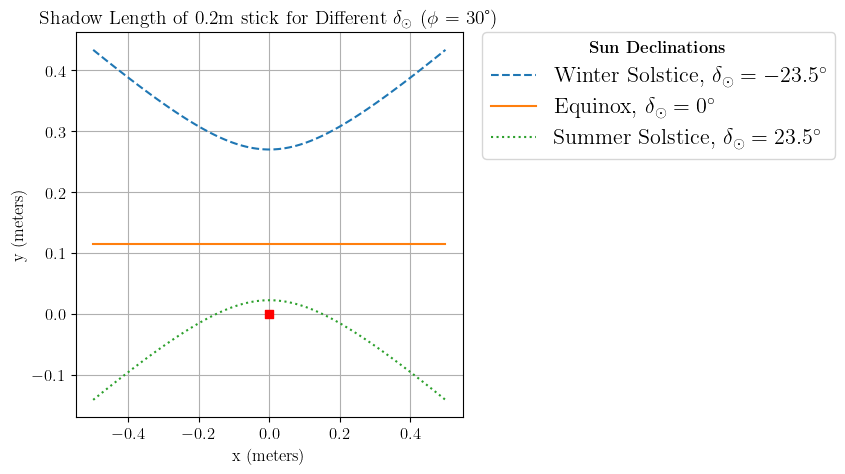

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate shadow point y
def get_shadow_point(lat, a, dec, x):
    # Convert latitude and declination from degrees to radians
    lat_rad = np.radians(lat)
    dec_rad = np.radians(dec)

    # Calculate cosines and sines of latitude and declination
    cos_phi = np.cos(lat_rad)
    sin_phi = np.sin(lat_rad)
    cos_delta = np.cos(dec_rad)
    sin_delta = np.sin(dec_rad)

    # Calculate the shadow point using the given formula
    numerator = (-a * sin_phi * cos_phi + sin_delta * np.sqrt(x * x * (cos_phi * cos_phi - sin_delta * sin_delta) + a * a * cos_delta * cos_delta))
    denominator = (sin_delta * sin_delta - cos_phi * cos_phi)

    y = numerator / denominator
    return y

# Constants
latitude = 30  # Latitude of the location in degrees
a = 0.2  # Height of the stick in meters
scale = 0.5  # Scaling factor for the clock
declinations = [-23.5, 0, 23.5]  # Declinations of the Sun (in degrees)
x_values = np.linspace(-scale, scale, 100)  # Range of x (distance along sundial base)

# Line styles for each declination
line_styles = ['--', '-', ':']
line_width = 5   # Solid, dashed, dotted

# Plotting the shadow point for each declination
plt.figure(figsize=(5, 5))

for idx, dec in enumerate(declinations):
    y_values = [get_shadow_point(latitude, a, dec, x) for x in x_values]
    if dec == 23.5:
        label = r'Summer Solstice, $\delta_\odot = 23.5^\circ$'
    elif dec == 0:
        label = r'Equinox, $\delta_\odot = 0^\circ$'
    else:
        label = r'Winter Solstice, $\delta_\odot = -23.5^\circ$'

    plt.plot(x_values, y_values, label=label, linestyle=line_styles[idx])

# Mark the origin (C point) where the stick is located with a square
plt.scatter(0, 0, color='red', marker='s', zorder=5)

# Customize the plot
plt.title(f"Shadow Length of {a}m stick for Different $\\delta_{{\\odot}}$ ($\\phi$ = {latitude}°)", fontsize=14)
plt.xlabel("x (meters)")
plt.ylabel("y (meters)")
plt.legend(title=r"\textbf{Sun Declinations}", fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
legend_properties = {'weight':'bold'}
plt.grid(True)

# Set equal aspect ratio to make clock circular
ax.set_aspect('equal', adjustable='box')

# Show the plot
plt.show()


Now, let us combine above two plots into one. For users of this note just change the latitude, $\phi$ in the code `phi`

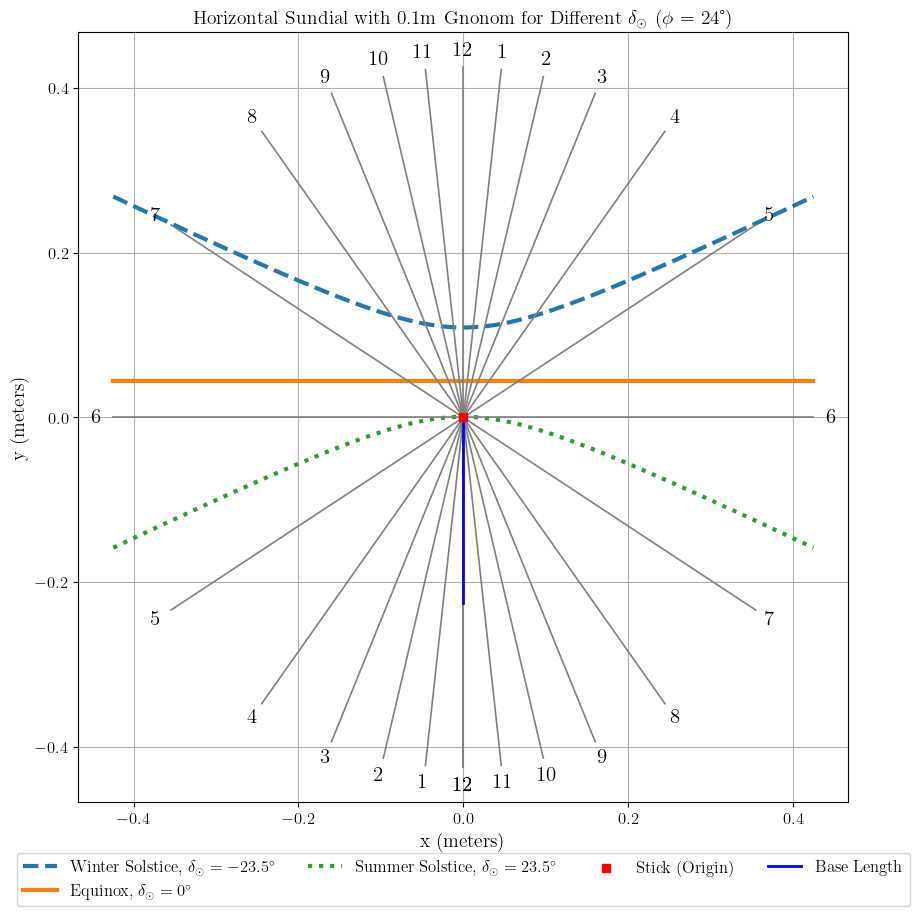

Base Length: 0.22 meters
12: 0.0°
1: 6.2°
2: 13.2°
3: 22.1°
4: 35.2°
5: 56.6°
6: 90.0°
7: 123.4°
8: 144.8°
9: 157.9°
10: 166.8°
11: 173.8°


In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate shadow point y
def get_shadow_point(lat, a, dec, x):
    # Convert latitude and declination from degrees to radians
    lat_rad = np.radians(lat)
    dec_rad = np.radians(dec)

    # Calculate cosines and sines of latitude and declination
    cos_phi = np.cos(lat_rad)
    sin_phi = np.sin(lat_rad)
    cos_delta = np.cos(dec_rad)
    sin_delta = np.sin(dec_rad)

    # Calculate the shadow point using the given formula
    numerator = (-a * sin_phi * cos_phi + sin_delta * np.sqrt(x * x * (cos_phi * cos_phi - sin_delta * sin_delta) + a * a * cos_delta * cos_delta))
    denominator = (sin_delta * sin_delta - cos_phi * cos_phi)

    y = numerator / denominator
    return y

# Function to calculate the angles for each hour based on latitude
def get_angles(latitude):
    # Convert latitude to radians
    lat_rad = np.radians(latitude)
    angles = []

    # Loop over the hours and calculate the angle
    for i in range(12):
        H = i * 15 * np.pi / 180  # Convert hour from hours to radians
        x = np.sin(H)
        y = np.cos(H) / np.sin(lat_rad)
        theta = np.arctan2(x, y)
        angles.append(np.degrees(theta))  # Convert radians to degrees

    return angles


# Constants
latitude = 24  # Latitude of the location in degrees
a = 0.1  # Height of the stick in meters
declinations = [-23.5, 0, 23.5]  # Declinations of the Sun (in degrees)

# Function to calculate the base length
def get_base_length(a, lat):
    # Calculate base length using the equation base = a / tan(lat)
    return a / np.tan(np.radians(lat))

# Calculate the base length
base_length = get_base_length(a, latitude)

scale = base_length +0.2  # Scaling factor for the clock
x_values = np.linspace(-scale, scale, 100)  # Range of x (distance along sundial base)

# Line styles for each declination
line_styles = ['--', '-', ':']

# Get the angles for the given latitude
angles_degrees = get_angles(latitude)

# Data for the clock (hours and angles)
hours = np.array([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Full hour marking: first 12, then 1 to 11, then another 12, and repeat 1 to 11
hours_full = np.concatenate([hours, [12], hours])

# Calculate corresponding angles for the full clock (12, 1, 2,..., 12, 1,...)
angles_full = np.concatenate([angles_degrees, [180], 180 + np.array(angles_degrees)])

# Convert angles to radians
angles_rad = np.radians(angles_full)

# Apply a mirroring by negating the angles
angles_rad_mirrored = -angles_rad

# Rotate the clock by 90 degrees (add pi/2)
angles_rad_rotated_90 = angles_rad_mirrored + np.pi / 2


# Plot setup
fig, ax = plt.subplots(figsize=(10, 10))

# Cartesian shadow plot
for idx, dec in enumerate(declinations):
    y_values = [get_shadow_point(latitude, a, dec, x) for x in x_values]
    if dec == 23.5:
        label = r'Summer Solstice, $\delta_\odot = 23.5^\circ$'
    elif dec == 0:
        label = r'Equinox, $\delta_\odot = 0^\circ$'
    else:
        label = r'Winter Solstice, $\delta_\odot = -23.5^\circ$'

    ax.plot(x_values, y_values, label=label, linestyle=line_styles[idx], linewidth=3)  # Thicker shadow curves

# Mark the origin (C point) where the stick is located with a square
ax.scatter(0, 0, color='red', marker='s', zorder=5, label="Stick (Origin)")

# Add the clock lines around the origin (rotated by 90 degrees)
for i, angle in enumerate(angles_rad_rotated_90):
    x_end = np.cos(angle) * scale  # Scale clock lines
    y_end = np.sin(angle) * scale
    ax.plot([0, x_end], [0, y_end], color='grey', linewidth=1.2)  # Grey clock lines
    ax.text(x_end * 1.05, y_end * 1.05, f"{hours_full[i]}",
            fontsize=15, ha='center', va='center')

# Draw the base line extending downward from the origin
ax.plot([0, 0], [0, -base_length], color='blue', linewidth=2, label='Base Length')

# Customize the plot
ax.set_title(f"Horizontal Sundial with {a}m Gnonom for Different $\\delta_{{\\odot}}$ ($\\phi$ = {latitude}°)", fontsize=14)
ax.set_xlabel("x (meters)", fontsize=14)
ax.set_ylabel("y (meters)", fontsize=14)
ax.legend(fontsize=12, bbox_to_anchor=(0.5, -0.1), loc='center', borderaxespad=0., ncol=4)
ax.grid(True)

# Set equal aspect ratio to make clock circular
ax.set_aspect('equal', adjustable='box')

# Show the combined plot
plt.savefig('Sundial.pdf', format='pdf')
plt.show()

# Print the base length
print(f"Base Length: {base_length:.2f} meters")

# Print the angles for each hour at the given latitude
for hour, angle in zip(hours, angles_degrees):
    print(f"{hour}: {angle:.1f}°")


### Let's plot the Horizontal Sundial so that it is A4 size paper printable ✊

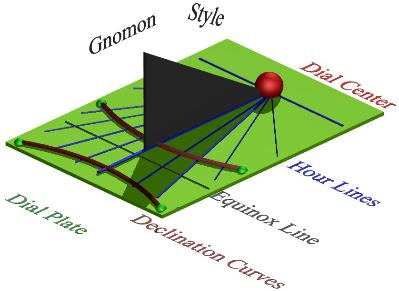

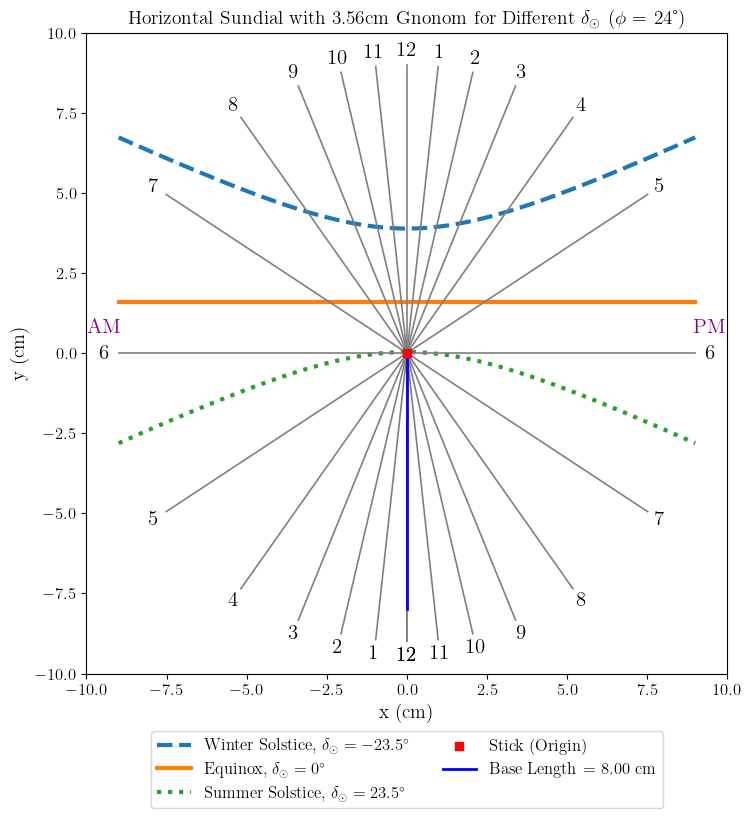

Base Length: 8.00 cm
12: 0.0°
1: 6.2°
2: 13.2°
3: 22.1°
4: 35.2°
5: 56.6°
6: 90.0°
7: 123.4°
8: 144.8°
9: 157.9°
10: 166.8°
11: 173.8°


In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate shadow point y
def get_shadow_point(lat, a, dec, x):
    lat_rad = np.radians(lat)
    dec_rad = np.radians(dec)

    cos_phi = np.cos(lat_rad)
    sin_phi = np.sin(lat_rad)
    cos_delta = np.cos(dec_rad)
    sin_delta = np.sin(dec_rad)

    numerator = (-a * sin_phi * cos_phi + sin_delta * np.sqrt(x * x * (cos_phi * cos_phi - sin_delta * sin_delta) + a * a * cos_delta * cos_delta))
    denominator = (sin_delta * sin_delta - cos_phi * cos_phi)

    y = numerator / denominator
    return y

def get_angles(latitude):
    lat_rad = np.radians(latitude)
    angles = []

    for i in range(12):
        H = i * 15 * np.pi / 180  # Convert hour from hours to radians
        x = np.sin(H)
        y = np.cos(H) / np.sin(lat_rad)
        theta = np.arctan2(x, y)
        angles.append(np.degrees(theta))  # Convert radians to degrees

    return angles


latitude = 24  # Latitude of the location in degrees
a_cm = 3.56  # Height of the stick in meters
declinations = [-23.5, 0, 23.5]  # Declinations of the Sun (in degrees)

def get_base_length(a, lat):
    return a / np.tan(np.radians(lat))

base_length = get_base_length(a_cm / 100, latitude) * 100  # Convert to cm

scale = base_length + 1  # Scaling factor for the clock in centimeters
x_values = np.linspace(-scale, scale, 100)  # Range of x (distance along sundial base)

line_styles = ['--', '-', ':']
angles_degrees = get_angles(latitude)

hours = np.array([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

hours_full = np.concatenate([hours, [12], hours])

angles_full = np.concatenate([angles_degrees, [180], 180 + np.array(angles_degrees)])

angles_rad = np.radians(angles_full)

angles_rad_mirrored = -angles_rad

angles_rad_rotated_90 = angles_rad_mirrored + np.pi / 2


fig, ax = plt.subplots(figsize=(8.27, 11.69))  # A4 (inches)

# Cartesian shadow plot
for idx, dec in enumerate(declinations):
    y_values = [get_shadow_point(latitude, a_cm, dec, x) for x in x_values]
    if dec == 23.5:
        label = r'Summer Solstice, $\delta_\odot = 23.5^\circ$'
    elif dec == 0:
        label = r'Equinox, $\delta_\odot = 0^\circ$'
    else:
        label = r'Winter Solstice, $\delta_\odot = -23.5^\circ$'

    ax.plot(x_values, y_values, label=label, linestyle=line_styles[idx], linewidth=3)

ax.scatter(0, 0, color='red', marker='s', zorder=5, label="Stick (Origin)")

for i, angle in enumerate(angles_rad_rotated_90):
    x_end = np.cos(angle) * scale
    y_end = np.sin(angle) * scale
    ax.plot([0, x_end], [0, y_end], color='grey', linewidth=1.2)
    ax.text(x_end * 1.05, y_end * 1.05, f"{hours_full[i]}", fontsize=15, ha='center', va='center')

ax.plot([0, 0], [0, -base_length], color='blue', linewidth=2, label=f'Base Length = {base_length:.2f} cm')

ax.set_title(f"Horizontal Sundial with {a_cm}cm Gnonom for Different $\\delta_{{\\odot}}$ ($\\phi$ = {latitude}°)", fontsize=14)
ax.set_xlabel("x (cm)", fontsize=14)
ax.set_ylabel("y (cm)", fontsize=14)
ax.legend(fontsize=12, bbox_to_anchor=(0.5, -0.15), loc='center', borderaxespad=0., ncol=2)
#ax.grid(True)

# Set axis limits
ax.set_xlim([-10, 10])  # Limiting x-axis from -20 to 20
ax.set_ylim([-10, 10])  # Limiting y-axis from -20 to 20

ax.set_aspect('equal', adjustable='box')

# Add AM and PM annotations
# 6-hour mark (for AM and PM) is at index 6
angle_6am = angles_rad_rotated_90[6]
x_6am = np.cos(angle_6am) * scale
y_6am = np.sin(angle_6am) * scale

# Annotate PM (on the left side), moving vertically up
ax.text(x_6am * 1.05, y_6am * 1.15 + 0.8, "PM", fontsize=15, ha='center', va='center', color='purple')

# Annotate AM (on the right side), moving vertically up
ax.text(x_6am * -1.05, y_6am * -1.15 + 0.8, "AM", fontsize=15, ha='center', va='center', color='purple')


# Save the plot as a PDF with A4 paper size
plt.savefig('Sundial_A4.pdf', format='pdf', dpi=300)
plt.show()

print(f"Base Length: {base_length:.2f} cm")

for hour, angle in zip(hours, angles_degrees):
    print(f"{hour}: {angle:.1f}°")
